## Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import re
import math

## Data

In [28]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [30]:
df.drop(columns=['url','phone'],axis=1,inplace = True)

# Cleaning
## Changing the Type of Data

In [31]:
df['rate'] = pd.to_numeric(df['rate'].str.split('/').str[0],errors= 'coerce')

In [32]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'] , errors='coerce')

In [33]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,44454.000000
mean,3.700449,283.697527,416.630112
std,0.440513,803.838853,194.614442
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,550.000000
max,4.900000,16832.000000,950.000000


## Dealing with Null Values

In [8]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)     7263
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace = True)

In [10]:
df.dropna(subset=['location','rest_type','cuisines'],inplace = True)

In [11]:
df['rate'].fillna(df['rate'].mean(), inplace = True)

In [12]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
df['reviews_list'].unique()

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [14]:
df['reviews_list'] = df['reviews_list'].str.replace("[^A-Za-z\s,]",'')

In [15]:
df['reviews_list'] = df['reviews_list'].str.replace("Rated" , '').str.replace("RATEDn" , '')

In [16]:
df['reviews_list'] = df['reviews_list'].str.strip()

In [107]:
df['reviews_list'].unique()

array([',   A beautiful place to dine inThe interiors take you back to the Mughal era The lightings are just perfectWe went there on the occasion of Christmas and so they had only limited items available But the taste and service was not compromised at allThe only complaint is that the breads could have been betterWould surely like to come here again,  ,   I was here for dinner with my family on a weekday The restaurant was completely empty Ambience is good with some good old hindi music Seating arrangement are good too We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha Food was fresh and good, service is good too Good for family hangoutnCheers,  ,   Its a restaurant near to Banashankari BDA Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet On inquiring they said this place is mostly visited by vegetarians Anyways we ordered ala carte items which took ages to

## Dealing with Outliers

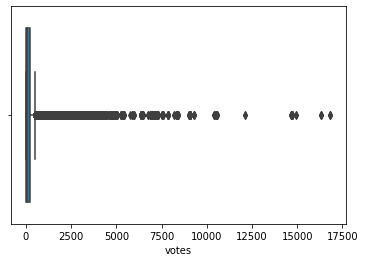

In [17]:
sns.boxplot(data=df,x= 'votes')

In [18]:
from datasist.structdata import detect_outliers

In [19]:
len(detect_outliers(df ,0,['votes']))

6924

In [20]:
df['votes'].loc[detect_outliers(df ,0,['votes'])]= np.nan

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                           6924
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [22]:
%%time
from sklearn.impute import KNNImputer
df['votes'] = KNNImputer(n_neighbors=5).fit_transform(df[['votes']])

Wall time: 3min 36s


In [24]:
len(detect_outliers(df ,0,['votes']))

6004

In [25]:
df = df.drop(detect_outliers(df ,0,['votes']))
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.100000,76.564456,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,", A beautiful place to dine inThe interiors ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.100000,76.564456,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,", Had been here for dinner with family Turne...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.800000,76.564456,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,", Ambience is not that good enough and its n...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.700000,88.000000,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,", Great food and proper Karnataka style full...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.800000,166.000000,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,", Very good restaurant in neighbourhood Buff...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.500000,81.000000,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,", A fine place to chill after office hours, ...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27.000000,Whitefield,Bar,NaN,Continental,400.0,", Food and service are incomparably excellen...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,3.702154,0.000000,Whitefield,Bar,NaN,Finger Food,600.0,,[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.702154,0.000000,Whitefield,Bar,NaN,Finger Food,400.0,,[],Pubs and bars,Whitefield


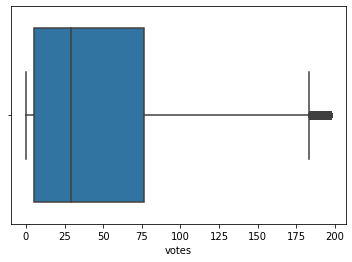

In [26]:
sns.boxplot(data=df,x= 'votes')

In [27]:
df.describe()

,rate,votes,approx_cost(for two people)
count,45462.000000,45462.000000,45462.000000
mean,3.678849,45.333802,403.111500
std,0.382681,47.330158,178.405603
min,2.100000,0.000000,40.000000
25%,3.500000,5.000000,300.000000
50%,3.702154,29.000000,400.000000
75%,3.900000,76.564456,500.000000
max,4.900000,197.000000,950.000000


# NLP

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\CRIZMA MEGA
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english',max_features=300)
tfidf_matrix  = tfidf.fit_transform(df['reviews_list'])
tfidf_matrix 

<51717x300 sparse matrix of type '<class 'numpy.float64'>'
	with 2742810 stored elements in Compressed Sparse Row format>

In [24]:
# Get the TF-IDF values for a specific review (e.g., the first review)
review_index = 0
tfidf_values = tfidf_matrix[review_index]

# Convert the TF-IDF values to a readable format
tfidf_scores = {term: score for term, score in zip(tfidf.get_feature_names(), tfidf_values.toarray()[0])}

# Print the TF-IDF scores for each term in the review
for term, score in sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True):
    print(f'{term}: {score}')


buffet: 0.5012056620220335
good: 0.3481837937481558
dish: 0.2971775344518421
food: 0.29106426105104266
place: 0.2562334412648092
makes: 0.16593078210493567
service: 0.16203347629477236
ambience: 0.14871791487099803
paratha: 0.13265516161282734
just: 0.13218793592502734
items: 0.12793946629289296
chilli: 0.10920428911339547
family: 0.10501704506025684
nice: 0.10496993886640102
took: 0.10267362337123756
starters: 0.10244391432799212
great: 0.10104282009941387
nservice: 0.10042292539402357
come: 0.09757799760968403
try: 0.09562800382954113
ok: 0.09523946502799961
thing: 0.09507324983102554
visited: 0.09047531823310175
went: 0.08691720845787808
recommend: 0.0844610991667116
restaurant: 0.07409826879108389
best: 0.06878677720088278
chill: 0.06456748235726284
corn: 0.06145769796526677
weekend: 0.06092715351843275
roti: 0.05999409253155967
expensive: 0.05963386388162169
beautiful: 0.05953126327115996
ordered: 0.05891460316349814
taste: 0.058339082161179744
dessert: 0.05830805303735546
soup: 0

In [25]:
pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names())

,absolutely,amazing,ambiance,ambience,area,asked,authentic,available,average,away,...,way,weekend,went,white,wings,work,worst,worth,yummy,zomato
0,0.000000,0.038920,0.047260,0.148718,0.000000,0.000000,0.052212,0.049094,0.000000,0.0,...,0.000000,0.060927,0.086917,0.0,0.0,0.000000,0.000000,0.039514,0.047661,0.000000
1,0.000000,0.029585,0.035925,0.113049,0.000000,0.000000,0.000000,0.037319,0.101745,0.0,...,0.000000,0.000000,0.033035,0.0,0.0,0.000000,0.040463,0.000000,0.000000,0.071663
2,0.000000,0.026325,0.000000,0.176034,0.000000,0.000000,0.000000,0.000000,0.090532,0.0,...,0.033108,0.000000,0.029395,0.0,0.0,0.000000,0.000000,0.026727,0.032237,0.000000
3,0.000000,0.000000,0.015739,0.037147,0.000000,0.000000,0.173887,0.000000,0.014859,0.0,...,0.081509,0.000000,0.028947,0.0,0.0,0.000000,0.000000,0.052639,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.148378,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0.000000,0.041545,0.201793,0.079375,0.111032,0.000000,0.000000,0.000000,0.095251,0.0,...,0.104501,0.065037,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
51713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
51714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
51715,0.000000,0.058185,0.000000,0.055584,0.000000,0.175401,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.163425,0.000000,0.000000,0.000000,0.000000


In [60]:
df.drop(columns=['rating_range'],axis=1,inplace = True)

In [63]:
df.drop(columns=['menu_item'],axis=1,inplace = True)

In [68]:
df.drop(columns=['listed_in(type)'],axis=1,inplace = True)

In [71]:
df.drop(columns=['dish_liked'],axis=1,inplace = True)

In [72]:
df.drop(columns=['address'],axis=1,inplace = True)

In [75]:
df.drop(columns=['listed_in(city)'],axis=1,inplace = True)

# Data Splitting 

# detect input featurs and output target

In [76]:
x = df.drop('rate' , axis = 1) ## indeppentent feature
y = df['rate'] ## dependent feature
x.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,76.146081,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,76.146081,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,76.146081,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,88.000000,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,166.000000,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [77]:
x = pd.get_dummies(x , drop_first= True)
x.head()

,votes,approx_cost(for two people),name_#L-81 Cafe,name_#Vibes Restro,name_#refuel,name_'Brahmins' Thatte Idli,name_1 Fahreheit,name_1000 B.C,name_100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,name_11 to 11 Express Biriyanis,...,"cuisines_Turkish, Arabian, Fast Food, Desserts, Healthy Food, Salad","cuisines_Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts","cuisines_Turkish, Chinese","cuisines_Turkish, Desserts","cuisines_Turkish, Fast Food","cuisines_Turkish, Fast Food, Biryani, Chinese","cuisines_Turkish, Rolls",cuisines_Vietnamese,"cuisines_Vietnamese, Salad","cuisines_Vietnamese, Thai, Burmese, Japanese"
0,76.146081,800.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,76.146081,800.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76.146081,800.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88.000000,300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,166.000000,600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 42 , test_size= 0.2)

## Robust Scaler

In [79]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_train_rscaler = rs.fit_transform(x_train)
x_test_rscaler = rs.transform(x_test)

In [86]:
x_train_rscaler = pd.DataFrame(x_train_rscaler, columns = x_train.columns)
x_train_rscaler

,votes,approx_cost(for two people),name_#L-81 Cafe,name_#Vibes Restro,name_#refuel,name_'Brahmins' Thatte Idli,name_1 Fahreheit,name_1000 B.C,name_100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,name_11 to 11 Express Biriyanis,...,"cuisines_Turkish, Arabian, Fast Food, Desserts, Healthy Food, Salad","cuisines_Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts","cuisines_Turkish, Chinese","cuisines_Turkish, Desserts","cuisines_Turkish, Fast Food","cuisines_Turkish, Fast Food, Biryani, Chinese","cuisines_Turkish, Rolls",cuisines_Vietnamese,"cuisines_Vietnamese, Salad","cuisines_Vietnamese, Thai, Burmese, Japanese"
0,-0.539474,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.447368,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.171053,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.539474,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.276316,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,-0.157895,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41369,0.736842,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41370,5.473684,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41371,-0.539474,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [36]:
b=df.groupby(['location','online_order'])[['rate']].mean().sort_values(by='rate').head(20)
b

,,rate
location,online_order,
"Varthur Main Road, Whitefield",No,3.025000
Bommanahalli,Yes,3.139560
North Bangalore,No,3.160000
Old Madras Road,Yes,3.164706
Peenya,No,3.200000
Rammurthy Nagar,No,3.200000
Nagawara,No,3.233333
Old Madras Road,No,3.240000
Hennur,No,3.257143


In [37]:
b=df.groupby('location')['name'].count().sort_values(ascending=False).head(10).reset_index()
b
# fig = px.bar(b, x='location', y='name',  title='num of restaurants per each loaction',color_discrete_sequence=['#0F6466'])
# fig


,location,name
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
5,Indiranagar,2083
6,Jayanagar,1926
7,Marathahalli,1846
8,Bannerghatta Road,1630
9,Bellandur,1286


In [38]:
b=df.groupby('address')['name'].count().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(b, x='address' , y='name',title='num of restorant per address',color_discrete_sequence=['#0F6466'])
b

,address,name
0,Delivery Only,128
1,"14th Main, 4th Sector, HSR, Bangalore",71
2,"The Ritz-Carlton, 99, Residency Road, Bangalore",61
3,"Citrus Hotels, 34, Cunningham Road, Bangalore",53
4,"Conrad Bengaluru, Kensington Road, Ulsoor, Ban...",49
5,"710, Thubarahalli, Varthur Main Road, Whitefie...",46
6,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",43
7,"40/2, Lavelle Road, Bangalore",41
8,"The Park Bangalore, 14/7, MG Road, Bangalore",38
9,"Radisson Blu, 1, Palace Road, Race Course Road...",37


In [40]:
b=df.groupby('online_order')['name'].count().reset_index().sort_values(by='online_order',ascending=False).head(10)
fig = px.bar(b, x='online_order' , y='name',title='num of online order per address',color_discrete_sequence=['#0F6466'])
b


,online_order,name
1,Yes,30444
0,No,21273


In [49]:
b=df.groupby(['online_order'])['rate'].mean().sort_values(ascending= False).reset_index()
fig = px.bar(b, x='online_order' , y='rate',title='rate of each online order status',color_discrete_sequence=['#D8B08C'])
b

,online_order,rate
0,Yes,3.72244
1,No,3.65907


In [41]:
b=df.groupby('rest_type')['approx_cost(for two people)'].mean().sort_values(ascending= True).head(10).reset_index()
fig = px.bar(b, x='rest_type' , y='approx_cost(for two people)',title='Approx cost for each rest',color_discrete_sequence=['#0F6466'])
b

,rest_type,approx_cost(for two people)
0,"Sweet Shop, Dessert Parlor",100.000000
1,"Dessert Parlor, Food Court",100.000000
2,"Bakery, Beverage Shop",178.125000
3,"Food Court, Beverage Shop",200.000000
4,"Bakery, Sweet Shop",200.000000
5,"Dessert Parlor, Kiosk",200.000000
6,"Quick Bites, Sweet Shop",207.333333
7,Beverage Shop,220.968858
8,Confectionery,229.411765
9,"Dessert Parlor, Sweet Shop",233.333333


In [42]:
b=df.groupby('rest_type')['rate'].mean().sort_values(ascending= False).head(10).reset_index()
fig = px.bar(b, x='rest_type' , y='rate',title='rate per rest_type',color_discrete_sequence=['#0F6466'])
b

,rest_type,rate
0,"Pub, Cafe",4.657500
1,"Bar, Pub",4.600000
2,Microbrewery,4.478571
3,"Pub, Microbrewery",4.452632
4,"Microbrewery, Bar",4.446154
5,"Microbrewery, Pub",4.438095
6,"Casual Dining, Irani Cafee",4.406667
7,"Cafe, Lounge",4.400000
8,"Fine Dining, Lounge",4.400000
9,"Microbrewery, Casual Dining",4.369421


In [43]:

# Define rating ranges (e.g., 1-2, 2-3, ..., 4-5)
rating_bins = [1, 2, 3, 4, 5]
rating_labels = ['1-2', '2-3', '3-4', '4-5']

# Categorize restaurants into rating ranges
df['rating_range'] = pd.cut(df['rate'].astype(float), bins=rating_bins, labels=rating_labels)

# Calculate the mean cost for two people within each rating range
avg_cost_by_rating = df.groupby('rating_range')['approx_cost(for two people)'].mean().reset_index()
avg_cost_by_rating
# Create a line chart using Plotly Express
# fig = px.line(avg_cost_by_rating, x='rating_range', y='approx_cost(for two people)', title='Average Cost for Two People by Rating Range',color_discrete_sequence=['#0F6466'])
# fig.update_xaxes(categoryorder='array', categoryarray=rating_labels)

# # Show the plot
# fig.show()



,rating_range,approx_cost(for two people)
0,1-2,800.000000
1,2-3,461.999336
2,3-4,416.295460
3,4-5,549.498650


In [44]:
b=df.groupby(['cuisines'])['name'].count().sort_values(ascending= False).head(10).reset_index()

fig = px.bar(b, x='cuisines' , y='name',title='Top 10 popular cuisines',color_discrete_sequence=['#0F6466'])
b

,cuisines,name
0,North Indian,2913
1,"North Indian, Chinese",2385
2,South Indian,1828
3,Biryani,918
4,"Bakery, Desserts",911
5,Fast Food,803
6,Desserts,766
7,Cafe,756
8,"South Indian, North Indian, Chinese",726
9,Bakery,651


In [45]:
b=df.groupby(['cuisines'])['votes'].mean().sort_values(ascending= False).head(10).reset_index()
fig = px.bar(b, x='cuisines' , y='votes',title='vote per each cuisine',color_discrete_sequence=['#D8B08C'])
b

,cuisines,votes
0,"Continental, North Indian, Italian, South Indi...",16588.500000
1,"Italian, American, Pizza",14956.000000
2,"North Indian, European, Mediterranean",10498.846154
3,"American, Continental, North Indian, Mediterra...",9164.500000
4,"American, Continental, Salad",8379.200000
5,"American, Continental, North Indian, Salad",7860.900000
6,"North Indian, European, Mediterranean, BBQ",7127.400000
7,"Cafe, American, Burger",7124.875000
8,"Cafe, American, Burger, Steak",7001.372093
9,"Continental, European, BBQ, Chinese, Asian",6986.600000


In [46]:
b=df.groupby(['listed_in(type)'])['rate'].mean().sort_values(ascending= False).head(10).reset_index()
fig = px.bar(b, x='listed_in(type)' , y='rate',title='rate per each type',color_discrete_sequence=['#D8B08C'])
b

,listed_in(type),rate
0,Pubs and bars,4.022933
1,Drinks & nightlife,4.017062
2,Buffet,3.982105
3,Cafes,3.872477
4,Desserts,3.777013
5,Dine-out,3.680826
6,Delivery,3.653257


In [47]:
b=df.groupby(['book_table'])['name'].count().sort_values(ascending= False).reset_index()
fig = px.bar(b, x='book_table' , y='name',title='book table per rest',color_discrete_sequence=['#D8B08C'])
b

,book_table,name
0,No,45268
1,Yes,6449


In [48]:
b=df.groupby(['book_table'])['rate'].mean().sort_values(ascending= False).reset_index()
fig = px.bar(b, x='book_table' , y='rate',title='book table per rest',color_discrete_sequence=['#D8B08C'])
b

,book_table,rate
0,Yes,4.143464
1,No,3.621470


In [50]:
b=df.groupby('dish_liked')['name'].count().sort_values(ascending=False)[:11].reset_index()
fig = px.bar(b, x='dish_liked' , y='name',title='The most dish_liked in all restaurant',color_discrete_sequence=['#D8B08C'])
b

,dish_liked,name
0,Biryani,182
1,Chicken Biryani,73
2,Friendly Staff,69
3,Waffles,68
4,Paratha,57
5,Masala Dosa,56
6,Rooftop Ambience,42
7,Coffee,42
8,Pizza,38
9,Burgers,33


In [52]:
b=df.groupby('name')['votes'].mean().sort_values(ascending= False).head(10).reset_index()
fig = px.bar(b, x='name' , y='votes',title='vote per each rest',color_discrete_sequence=['#D8B08C'])
b

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7860.900000
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,The Hole in the Wall Cafe,7124.875000
9,Truffles,7001.372093


# Visualization with streamlit

In [ ]:
%%writefile zomato.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


st.set_page_config(layout='wide',page_title = 'Zomato',page_icon=':bar_chart:')
#st.markdown("<h1 style='text_align:center ; color:#0F6466;'> Zomato </h1>", unsafe_allow_html=True)
st.title(" :bar_chart: Zomato")
st.markdown('<style>div.block-container{padding-top:1rem;}</style>',unsafe_allow_html=True)

df = pd.read_csv('zomato.csv',encoding ='ISO-8859-1')
df_no_duplicates = df.drop_duplicates()
df = df.drop(columns=['url','phone'])
df['rate'] = pd.to_numeric(df['rate'].str.split('/').str[0],errors= 'coerce')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'] , errors='coerce')

st.image('open-kitchen-restaurant.jpg', caption='Image Caption', use_column_width=True, width=300)

box = st.sidebar.checkbox('show data', False ,key =1)
if box:
    st.header('sample data')
    st.dataframe(df.head(10))

st.sidebar.header("Choose your filter: ")    
name=st.sidebar.selectbox('Select Restorant Name',df['name'].unique())
online_order=st.sidebar.selectbox('select online order status',df['online_order'].unique())
location=st.sidebar.selectbox('Select the location',df['location'].unique())

num_of_category=len(list(df['rest_type'].unique()))
num_of_rest=len(list(df['name'].unique()))
num_of_city=len(list(df['listed_in(city)'].unique()))


a1, a2, a3 = st.columns(3)

# Add HTML styling for the titles and values
a1.markdown("<h3 style='text-align:center; color:#0F6466;'>Category</h3>", unsafe_allow_html=True)
a2.markdown("<h3 style='text-align:center; color:#0F6466;'>Restaurant</h3>", unsafe_allow_html=True)
a3.markdown("<h3 style='text-align:center; color:#0F6466;'>City</h3>", unsafe_allow_html=True)

a1.metric("Category", num_of_category)
a2.metric("Restaurant", num_of_rest)
a3.metric("City", num_of_city)
#col1 , col2 , col3 = st.columns(3)
col1 , col2  = st.columns(2)
with col1:

    fig = px.bar(df, x='location' , y='rate',color='online_order',barmode='group',title='rate of loaction',color_discrete_sequence=['#0F6466','#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby('location')['name'].count().sort_values(ascending=False)[:11].reset_index()
    fig = px.bar(b, x='location' , y='name',title='num of rest per loaction',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby('address')['online_order'].count().sort_values(ascending=False).head(10).reset_index()
    fig = px.bar(b, x='address' , y='online_order',title='num of online order per address',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)

    
    b=df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='location' , y='approx_cost(for two people)',title='Approx cost for each rest',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby(['rest_type'])['rate'].mean().sort_values().head(10).reset_index()
    fig = px.bar(b, x='rest_type' , y='rate',title='rate per rest_type',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)

    #new_df = df[df['location'] == location]
    b=df.groupby(['cuisines'])['name'].count().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='cuisines' , y='name',title='Top 10 popular cuisines',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)

    
    fig=px.histogram(df,'rate',title='Distribution of Restaurant Ratings',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)
    
    
    top_restaurant_types = df['rest_type'].value_counts().head(7)
    data = pd.DataFrame({'Restaurant Type': top_restaurant_types.index, 'Count': top_restaurant_types.values})
    custom_colors = ['#0F6466', '#004F4D', '#1F2024', '#4B4952', '#79717A', '#A68F97', '#183B59']
    fig = px.pie(data, names='Restaurant Type', values='Count',
                 title='Distribution of Restaurant Types')
    fig.update_traces(marker=dict(colors=custom_colors))
    st.plotly_chart(fig,use_container_width=True)
    
    #new_df = df[df['name'] == name]
    b=df.groupby(['cuisines'])['rate'].mean().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='cuisines' , y='rate',title='rate of cuisines',color_discrete_sequence=['#0F6466'])
    st.plotly_chart(fig,use_container_width=True)


with col2:

    b=df.groupby(['listed_in(type)'])['rate'].mean().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='listed_in(type)' , y='rate',title='rate per each type',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby(['book_table'])['name'].count().sort_values(ascending= False).reset_index()
    fig = px.bar(b, x='book_table' , y='name',title='book table per rest',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby(['book_table'])['rate'].mean().sort_values(ascending= False).reset_index()
    fig = px.bar(b, x='book_table' , y='rate',title='book table per rest',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)
    
    b=df.groupby(['online_order'])['rate'].mean().sort_values(ascending= False).reset_index()
    fig = px.bar(b, x='online_order' , y='rate',title='rate of each online order status',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby('dish_liked')['name'].count().sort_values(ascending=False)[:11].reset_index()
    fig = px.bar(b, x='dish_liked' , y='name',title='num of dish_liked',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby('dish_liked')['rate'].mean().sort_values(ascending=False).head(10).reset_index()
    fig = px.bar(b, x='dish_liked' , y='rate',title='rate of dish_liked',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    
    rating_bins = [1, 2, 3, 4, 5]
    rating_labels = ['1-2', '2-3', '3-4', '4-5']
    df['rating_range'] = pd.cut(df['rate'].astype(float), bins=rating_bins, labels=rating_labels)
    avg_cost_by_rating = df.groupby('rating_range')['approx_cost(for two people)'].mean().reset_index()
    fig = px.line(avg_cost_by_rating, x='rating_range', y='approx_cost(for two people)', title='Average Cost for Two People by Rating Range',color_discrete_sequence=['#0F6466'])
    fig.update_xaxes(categoryorder='array', categoryarray=rating_labels)
    st.plotly_chart(fig,use_container_width=True)
    
    top_cuisines = df['cuisines'].value_counts().sort_values(ascending=False).head(10).index
    filtered_df = df[df['cuisines'].isin(top_cuisines)]
    fig = px.box(filtered_df, x='cuisines', y='rate', title='Box Plot of Ratings by Cuisine Type',color_discrete_sequence=['#0F6466'])
    fig.update_layout(
        xaxis_title='Cuisine Type',
        yaxis_title='Rating',
        xaxis_categoryorder='total descending'  # Order cuisines by the total number of restaurants
    )
    st.plotly_chart(fig,use_container_width=True)
    
    word_frequencies = df['dish_liked'].str.split().explode().value_counts().head(30).reset_index()
    word_frequencies.columns = ['Word', 'Frequency']
    fig = px.scatter(word_frequencies, x='Word', y='Frequency', size='Frequency', 
                     title='Restaurant Name Word Cloud', color='Word', text='Word')
    fig.update_traces(marker=dict(size=word_frequencies['Frequency'] * 0.5))  # Adjust the size scaling

    # Customize the layout
    fig.update_layout(
        xaxis_title=None,
        yaxis_title=None,
        showlegend=False
    )
    st.plotly_chart(fig,use_container_width=True)


    new_df = df[df['online_order'] == online_order]
    b=new_df.groupby('name')['votes'].mean().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='name' , y='votes',title='vote per each rest',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

    b=df.groupby(['cuisines'])['votes'].mean().sort_values(ascending= False).head(10).reset_index()
    fig = px.bar(b, x='cuisines' , y='votes',title='vote per each cuisine',color_discrete_sequence=['#D8B08C'])
    st.plotly_chart(fig,use_container_width=True)

In [ ]:
! streamlit run zomato.py